# Standard scanpy workflow version 2.8 #

CRC and healthy donor data downloaded from GEO GSE132465.

### Import section ###

In [1]:
import besca as bc
import numpy as np
import pandas as pd
import scanpy.api as sc
import matplotlib.pyplot as plt
from scipy import sparse, io
import os
import time
sc.logging.print_versions()

import logging
import seaborn as sns

# for standard processing, set verbosity to minimum
sc.settings.verbosity = 0  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)
version = '2.8'
start0 = time.time()

./.conda/envs/besca_dev/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
./.conda/envs/besca_dev/lib/python3.7/site-packages/scanpy/api/__init__.py:6: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,
./.local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


scanpy==1.4.5.post2 anndata==0.7.1 umap==0.3.10 numpy==1.17.4 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.21.3 statsmodels==0.10.2 python-igraph==0.8.2


## Setup Standard Wokflow

### Parameters to be set - on the command line or here ###

In [2]:
# decisions to be made
species = 'human'
batch_to_correct = 'None' # must be "None" or any one of the labels in "metadata.tsv", ID, SPECIES, TISSUE, DONOR, TREATMENT; typically "ID" or "DONOR"
analysis_name = 'sw_besca2_bescapub'
split_condition='Patient' #'experiment' is generally a good default
dynrange=['B2m','Actb','Pgk1','Ctcf'] #genes for which to plot dynamic range
if species=='human': dynrange=[x.upper() for x in dynrange]

#additional labeling
labeling_to_use = 'None' # must be "None" or any one of the labels in "metadata.tsv", ID, SPECIES, TISSUE, DONOR, TREATMENT; typically "ID" or "DONOR"
labeling_name = 'Cell_Type' # define name under which the labeling should be exported
labeling_description = 'celltype annotation' #define description which should be saved to labeling_info file
labeling_author = 'public' #define author which should be saved to labeling info file

### Define Input ###

In [3]:
# define filepath (this is the folder that contains "raw" and "analyzed")
root_path = os.getcwd() #

### Standard parameters - these should be kept as stable as possible ###

In [14]:
# the standard parameter section
standard_min_genes = 500
standard_min_cells = 20
standard_min_counts = 1000
standard_n_genes = 6000 # this is the most tricky one to set
standard_percent_mito = 0.1
standard_max_counts = 70000 #might be redundant with n_genes

## Standard Pipeline
(note nothing below this point should be modified!!)

In [15]:
#define standardized filepaths based on above input
results_folder = os.path.join(root_path, 'analyzed', analysis_name)
results_file = os.path.join(results_folder, analysis_name + '.h5ad') # specify a .h5ad file for storing the results
log_file = os.path.join(results_folder, analysis_name + '.standard.log') # specify a log file for keeping a short summary and overview
sc.settings.figdir = os.path.join(results_folder, 'figures')

#setup standard workflow (generates output directories and setsup logging file)
bc.st.setup(results_folder, 
          analysis_name, 
          labeling_name, 
          labeling_to_use, 
          log_file, 
          version,
          root_path, 
          species, 
          batch_to_correct, 
          standard_min_genes,
          standard_min_cells,
          standard_min_counts,
          standard_n_genes,
          standard_percent_mito,
          standard_max_counts)

#read input data
adata = bc.st.read_matrix(root_path)
#adata = bc.datasets.pbmc_storage_raw()#(root_path)

LOG MESSAGE: Standard Pipeline Version 2.8 used
LOG MESSAGE: Standard Pipeline Version 2.8 used
LOG MESSAGE: 2020-05-09
LOG MESSAGE: 2020-05-09
LOG MESSAGE: Analysis 'sw_besca2.0_bescapub' on data located in'.'
LOG MESSAGE: Analysis 'sw_besca2.0_bescapub' on data located in'.'
LOG MESSAGE: species: human
LOG MESSAGE: species: human
LOG MESSAGE: Batch effect to correct: None
LOG MESSAGE: Batch effect to correct: None
LOG MESSAGE: Parameters:
LOG MESSAGE: Parameters:
LOG MESSAGE: 	standard_min_genes = 500
LOG MESSAGE: 	standard_min_genes = 500
LOG MESSAGE: 	standard_min_cells = 20
LOG MESSAGE: 	standard_min_cells = 20
LOG MESSAGE: 	standard_min_counts = 1000
LOG MESSAGE: 	standard_min_counts = 1000
LOG MESSAGE: 	standard_n_genes = 6000
LOG MESSAGE: 	standard_n_genes = 6000
LOG MESSAGE: 	standard_max_counts = 70000
LOG MESSAGE: 	standard_max_counts = 70000
LOG MESSAGE: 	standard_percent_mito = 0.1
LOG MESSAGE: 	standard_percent_mito = 0.1
LOG MESSAGE: 	Time for creating all output directo

all output directories created successfully
reading matrix.mtx
adding genes
adding cell barcodes
making var_names unique
adding ENSEMBL gene ids to adata.var
adding annotation


LOG MESSAGE: After input: 63689 cells, 21383 genes
LOG MESSAGE: After input: 63689 cells, 21383 genes
LOG MESSAGE: 	Time for reading data: 10.813s
LOG MESSAGE: 	Time for reading data: 10.813s


In [16]:
#calculate mitochondrial gene content
bc.pp.fraction_counts(adata=adata, species=species) #

None of the genes from input list found in data set.                Please ensure you have correctly specified use_genes to match                the type of genes saved in adata.var_names.


In [17]:
adata.write(results_file+'.raw.h5ad')

... storing 'CONDITION' as categorical
... storing 'Patient' as categorical
... storing 'Tissue' as categorical
... storing 'Sample' as categorical
... storing 'Cell_type' as categorical
... storing 'Cell_subtype' as categorical
... storing 'SYMBOL' as categorical


### Visualization of quality control plots and selected filtering parameters

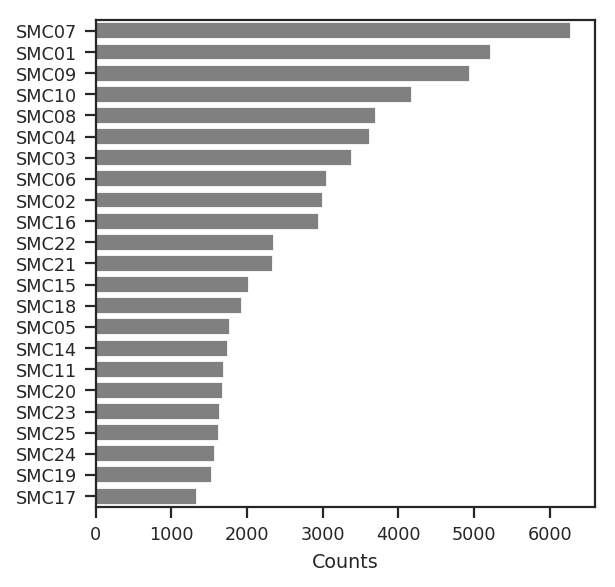

In [18]:
### have a look at cell nrs per sample ### 
sns.set_context("paper", font_scale=0.9)
temp=bc.tl.count_occurance(adata,split_condition)
sns.barplot(y=temp.index,x=temp.Counts,color='gray',orient='h')

##### Transcript Capture Efficiency
This plot gives you an idea about the sequencing depth and if the sequencing has reached saturation or not.

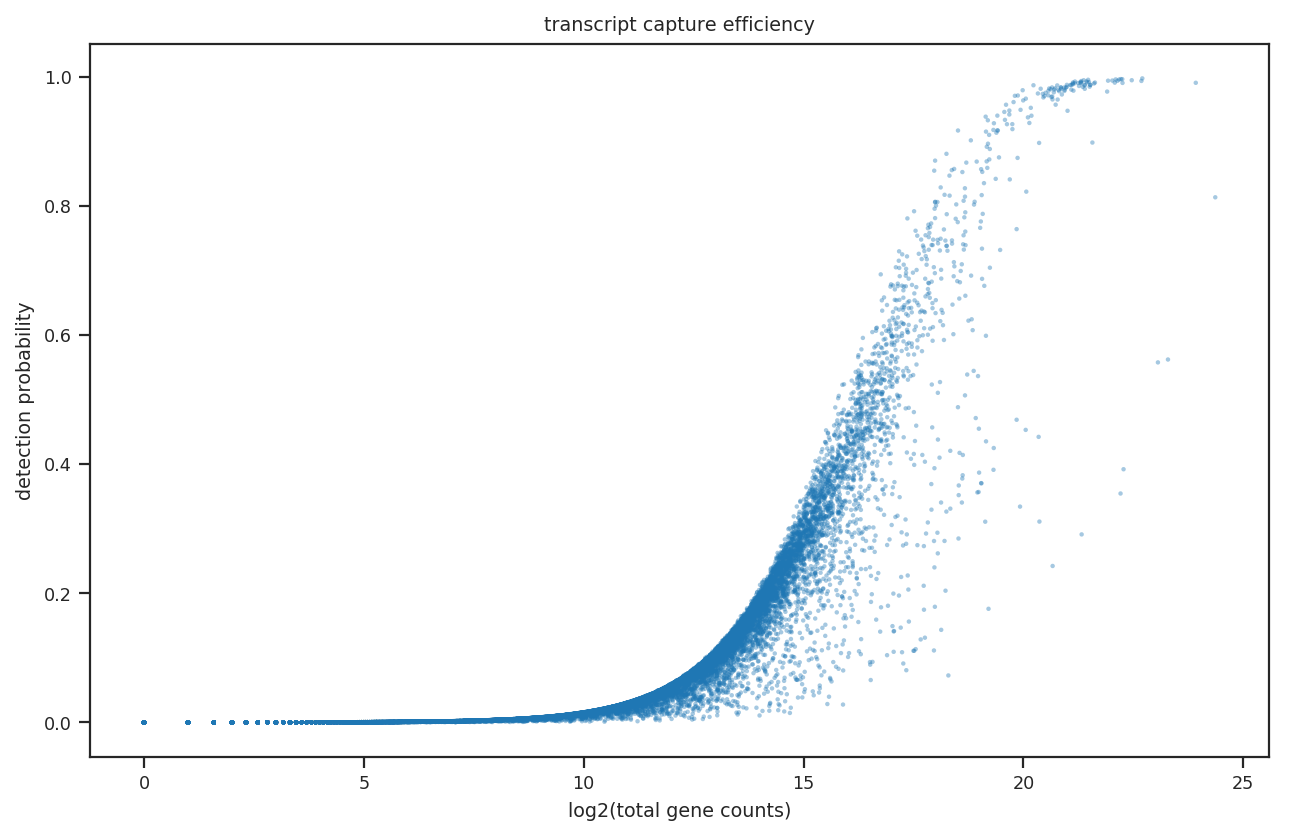

In [19]:
fig, ax = plt.subplots(1)
fig.set_figwidth(8)
fig.set_figheight(5)
fig.tight_layout()

bc.pl.transcript_capture_efficiency(adata,ax=ax)
fig.savefig(os.path.join(results_folder, 'figures/transcriptcaptureefficiency.png'), format='png', bbbox_inches = 'tight') #save figure for QC report

##### Library Size distribution
This plot gives you an idea about the library size distribution in your dataset before processing.

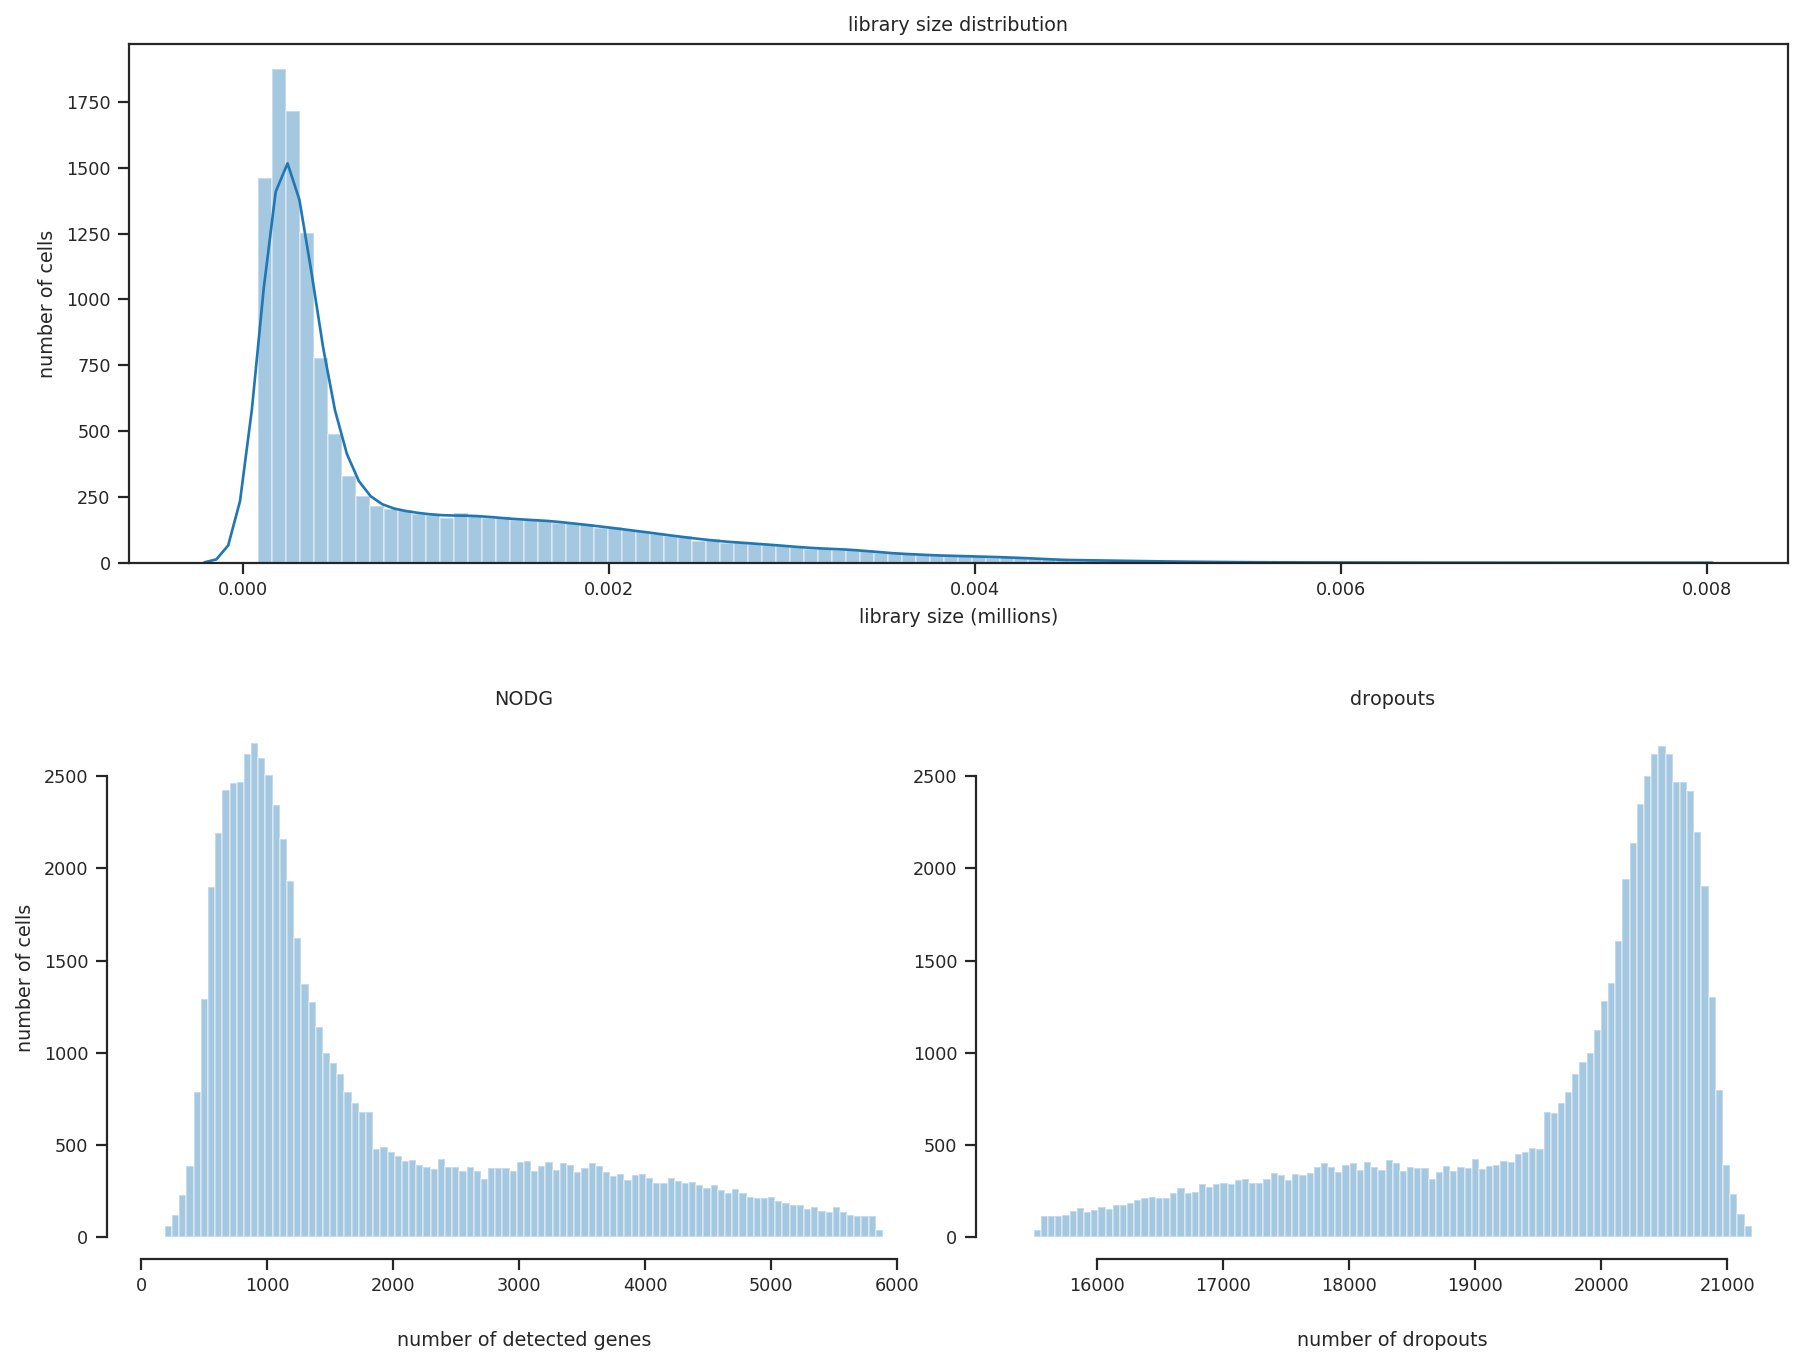

In [20]:
fig = bc.pl.librarysize_overview(adata, bins=100)
fig.savefig(os.path.join(results_folder, 'figures/librarysize.png'), format='png',bbbox_inches = 'tight') #save figure for QC report

In [21]:
adata_unfiltered = adata.copy()

##### Selected Filtering Parameters

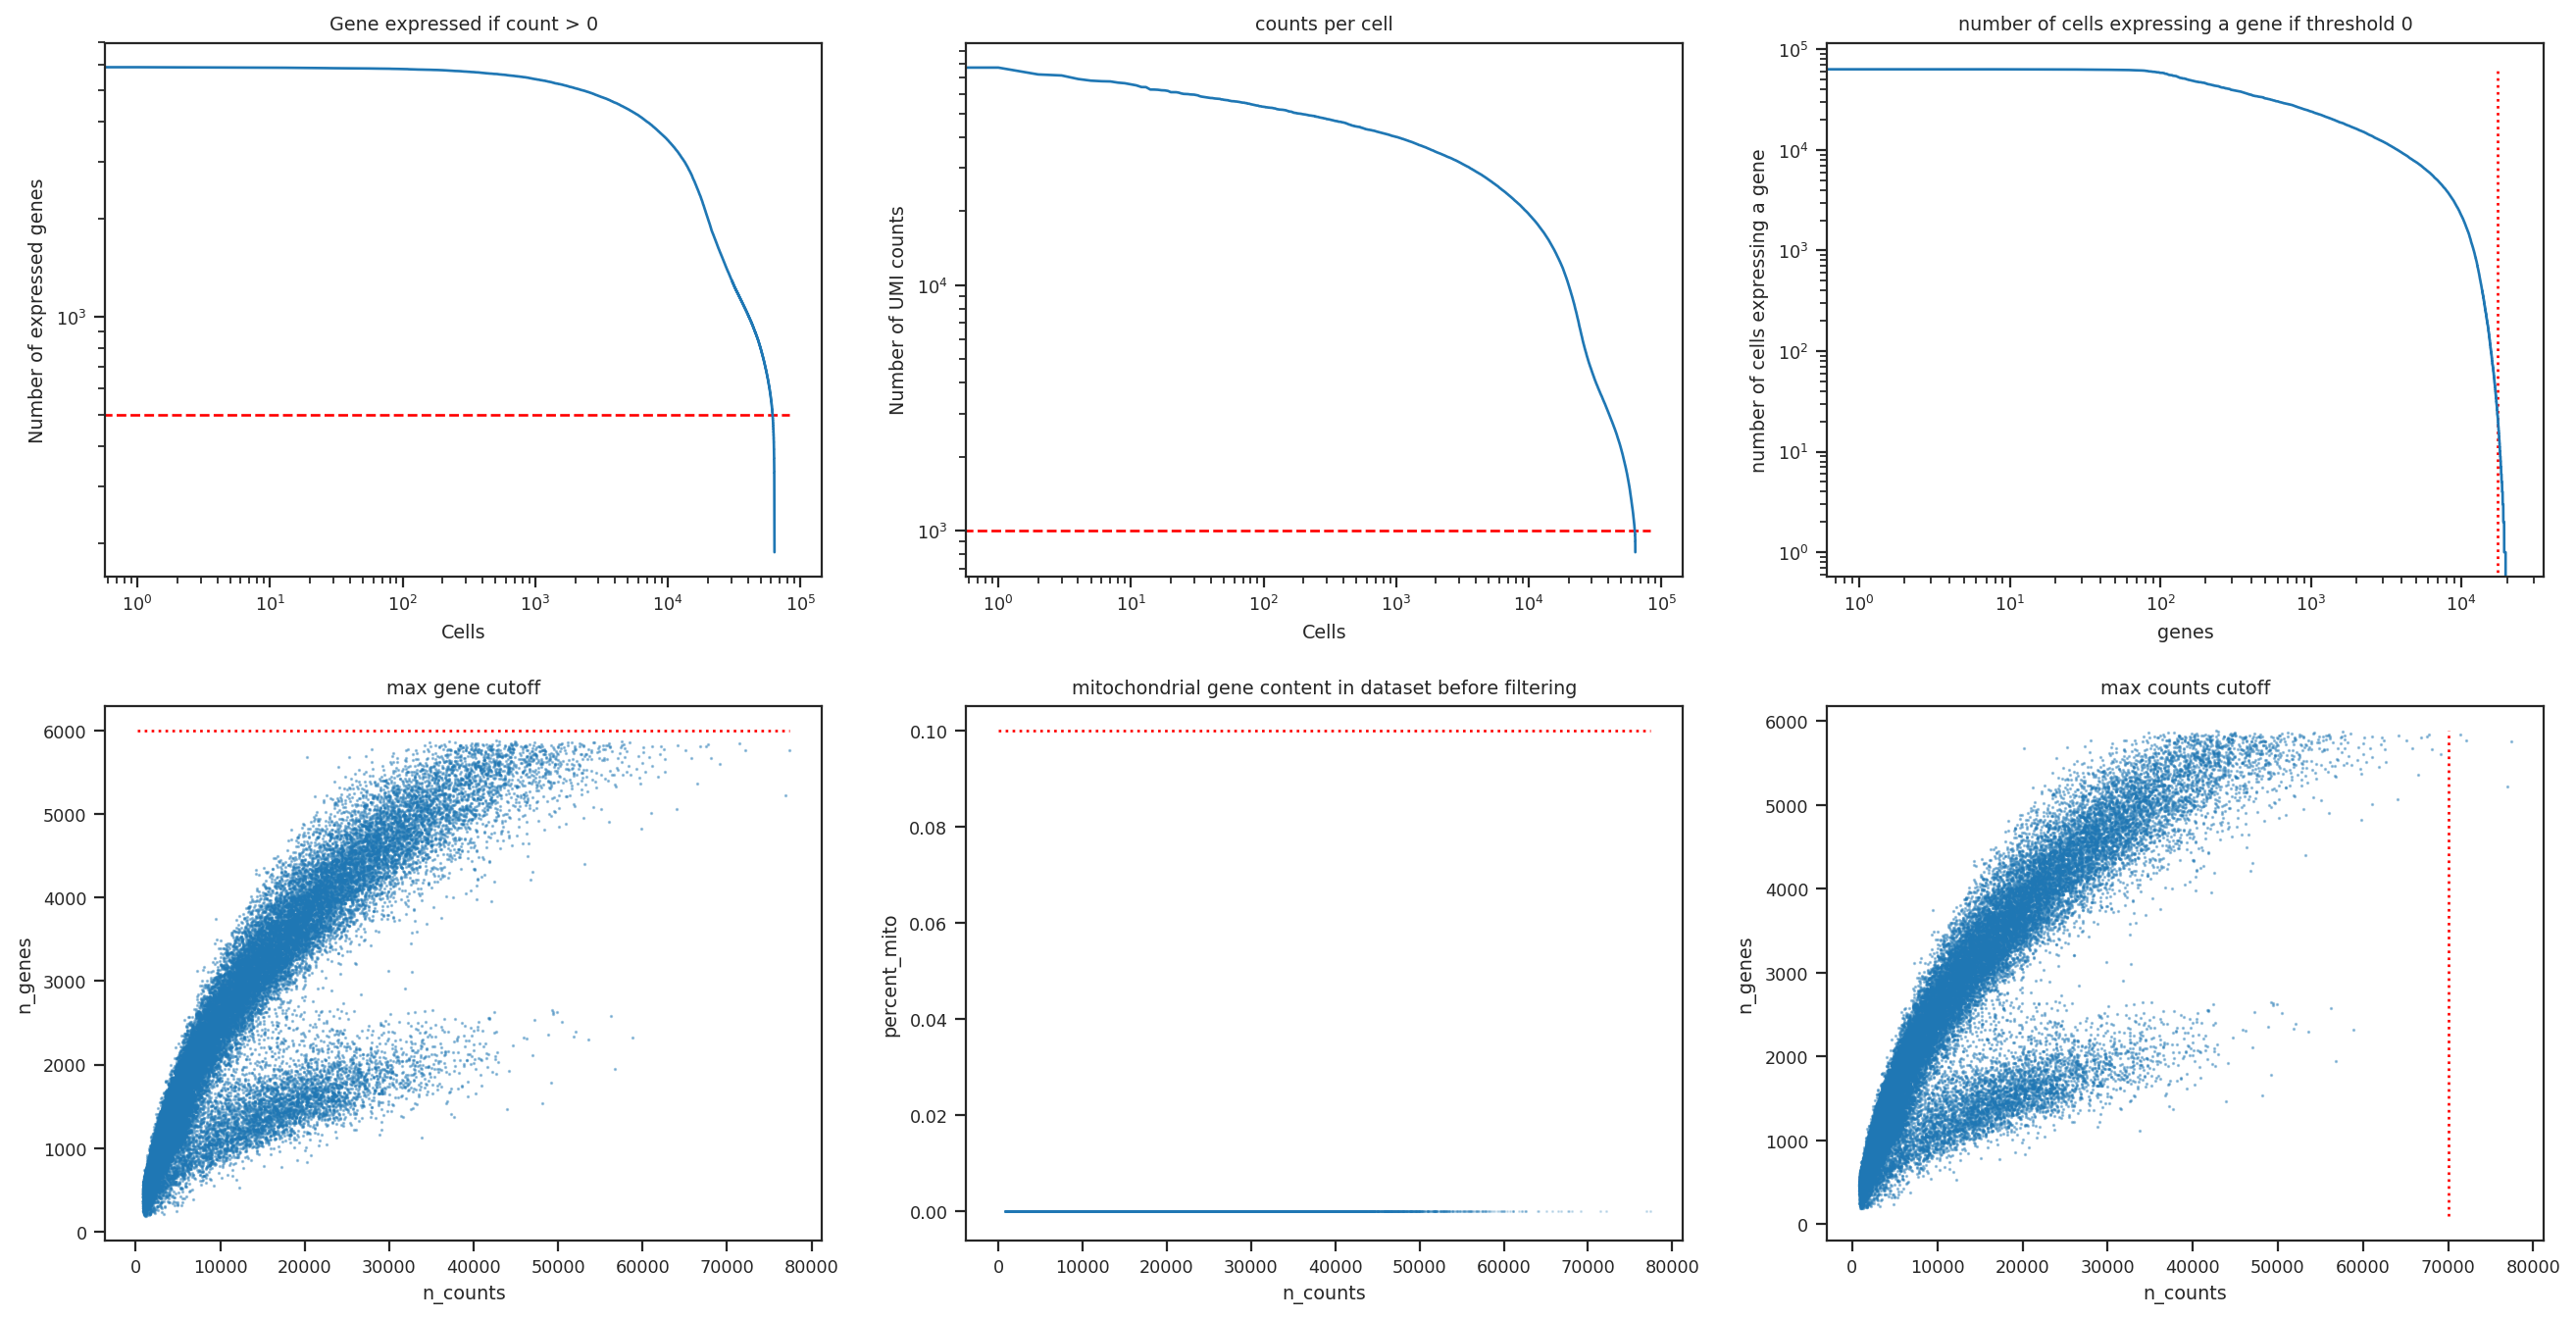

In [22]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols=3, nrows=2)
fig.set_figwidth(17)
fig.set_figheight(9)
fig.tight_layout(pad=4.5)

bc.pl.kp_genes(adata, min_genes=standard_min_genes, ax = ax1)
bc.pl.kp_counts(adata, min_counts=standard_min_counts, ax = ax2)
bc.pl.kp_cells(adata, min_cells=standard_min_cells, ax = ax3)
bc.pl.max_genes(adata, max_genes=standard_n_genes, ax = ax4)
bc.pl.max_mito(adata, max_mito=standard_percent_mito, annotation_type='SYMBOL', species=species, ax = ax5)
bc.pl.max_counts(adata, max_counts=standard_max_counts, ax=ax6)
fig.savefig(os.path.join(results_folder, 'figures/filtering_thresholds.png'), format='png', bbbox_inches = 'tight') #save figure for QC report

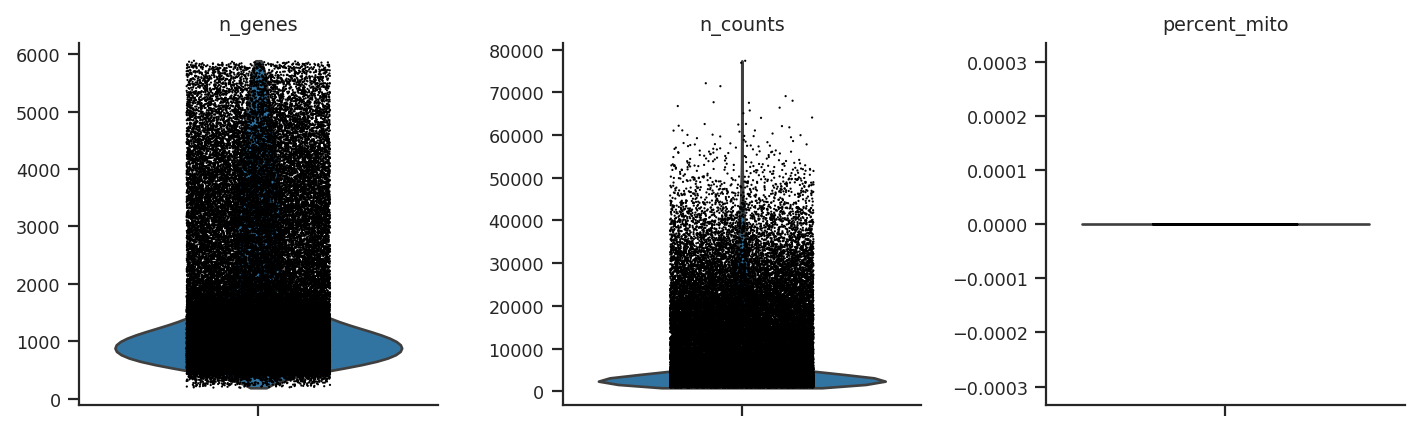

In [23]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'], jitter=0.2, multi_panel=True, save = '.before_filtering.png')

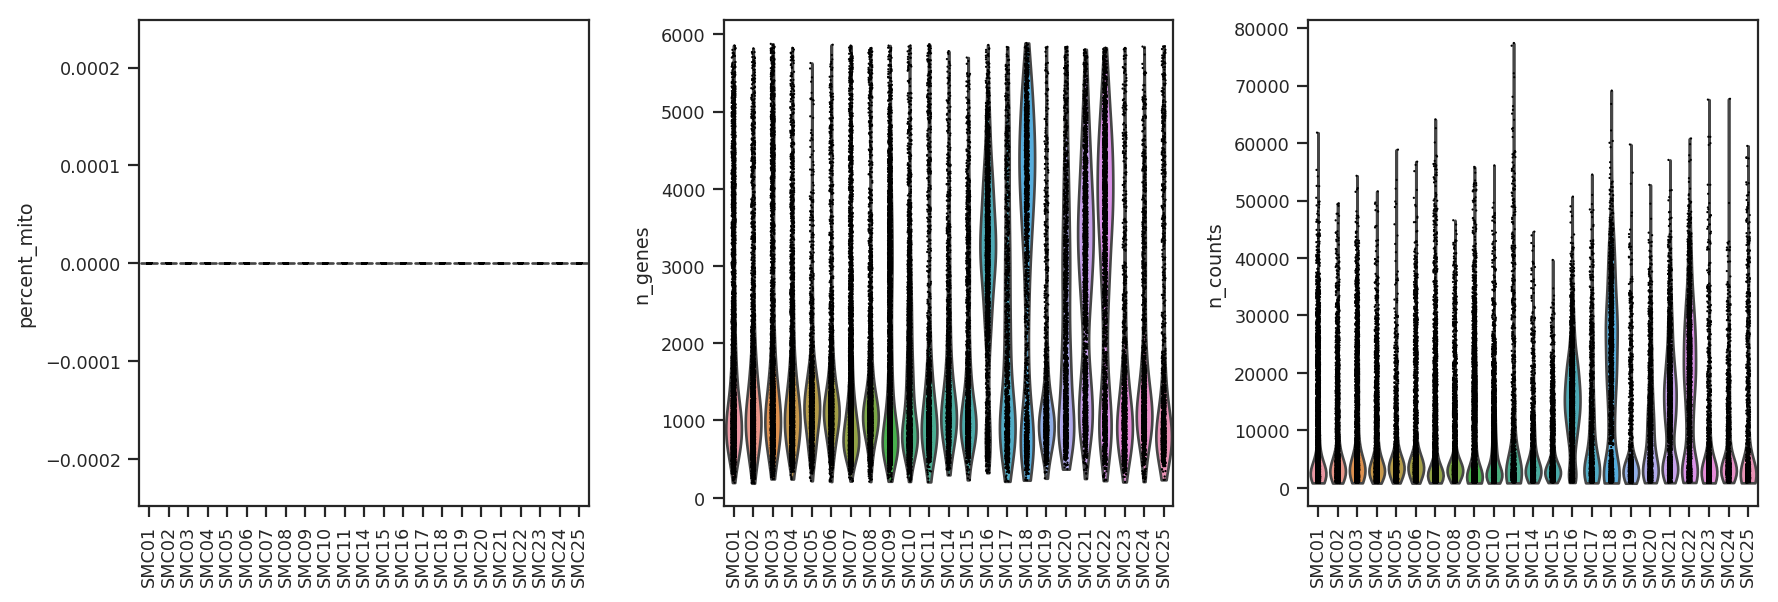

In [24]:
### check mitochondrial reads per sample 
sc.pl.violin(adata, ['percent_mito','n_genes', 'n_counts'], groupby=split_condition,jitter=0.1,rotation=90, save = '.before_filtering.split.png')

### First filtering on gene and cell counts

In [25]:
%%capture filtering1
adata = bc.st.filtering_cells_genes_min(adata, standard_min_cells, standard_min_genes, standard_min_counts)

LOG MESSAGE: After filtering for minimum number of cells and minimum number of expressed genes: 61374 cells, 17471 genes
LOG MESSAGE: After filtering for minimum number of cells and minimum number of expressed genes: 61374 cells, 17471 genes
LOG MESSAGE: 	Time for filtering: 3.535s
LOG MESSAGE: 	Time for filtering: 3.535s


In [26]:
filtering1.show()

started with  63689  total cells and  21383  total genes
removed 2106 cells that did not express at least 500  genes
removed 209 cells that did not have at least 1000 counts
removed 3912 genes that were not expressed in at least 20 cells
finished with 61374  total cells and 17471 total genes


### Second filtering on mitochondrial genes, and upper limit for gene number ###

In [27]:
%%capture filtering2
adata = bc.st.filtering_mito_genes_max(adata, standard_percent_mito, standard_n_genes, standard_max_counts)

LOG MESSAGE: After filtering for maximum number of expressed genes and max percent mito: 61370 cells, 17471 genes
LOG MESSAGE: After filtering for maximum number of expressed genes and max percent mito: 61370 cells, 17471 genes
LOG MESSAGE: 	Time for filtering: 2.28s
LOG MESSAGE: 	Time for filtering: 2.28s


In [28]:
filtering2.show()

started with  61374  total cells and  17471  total genes
removed 0 cells that expressed more than 6000 genes
removed 4 cells that had more than 70000  counts
removed  0  cells that expressed  10.0 percent mitochondrial genes or more
finished with 61370  total cells and 17471 total genes


###  Filtered dataset characteristics

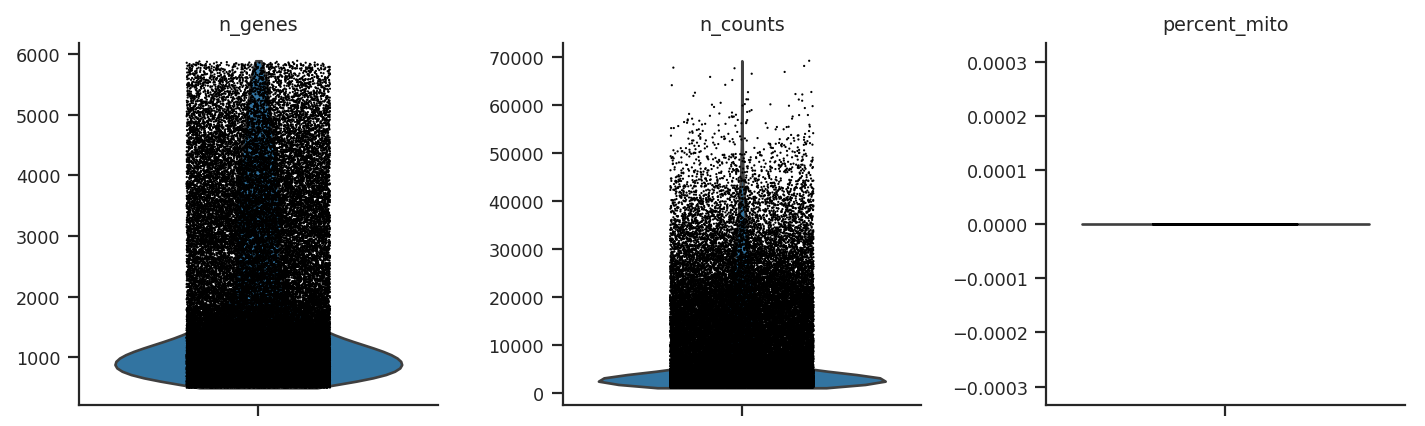

In [29]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'], jitter=0.2, multi_panel=True, save = '.after_filtering.png')

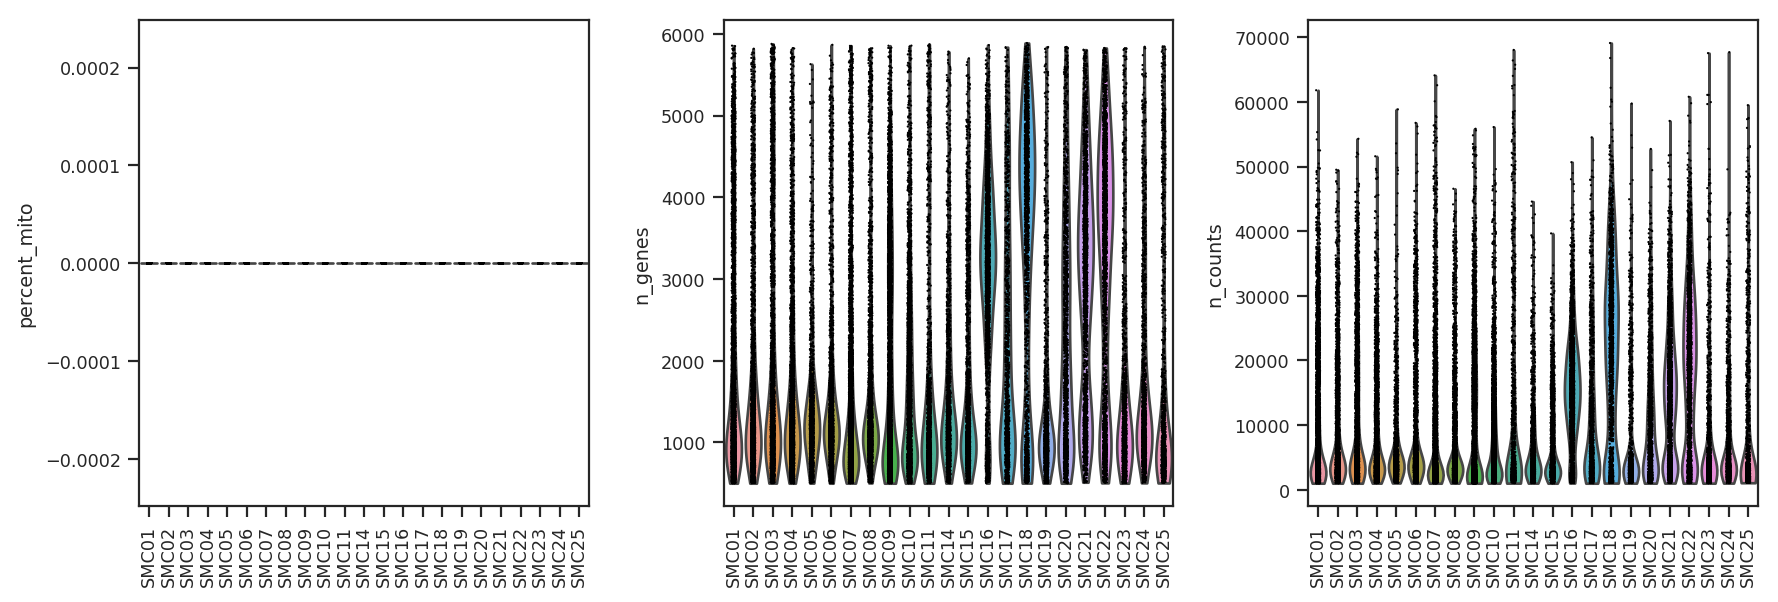

In [30]:
### check mitochondrial reads per sample 
sc.pl.violin(adata, ['percent_mito','n_genes', 'n_counts'], groupby=split_condition,jitter=0.1,rotation=90, save = '.after_filtering.split.png')

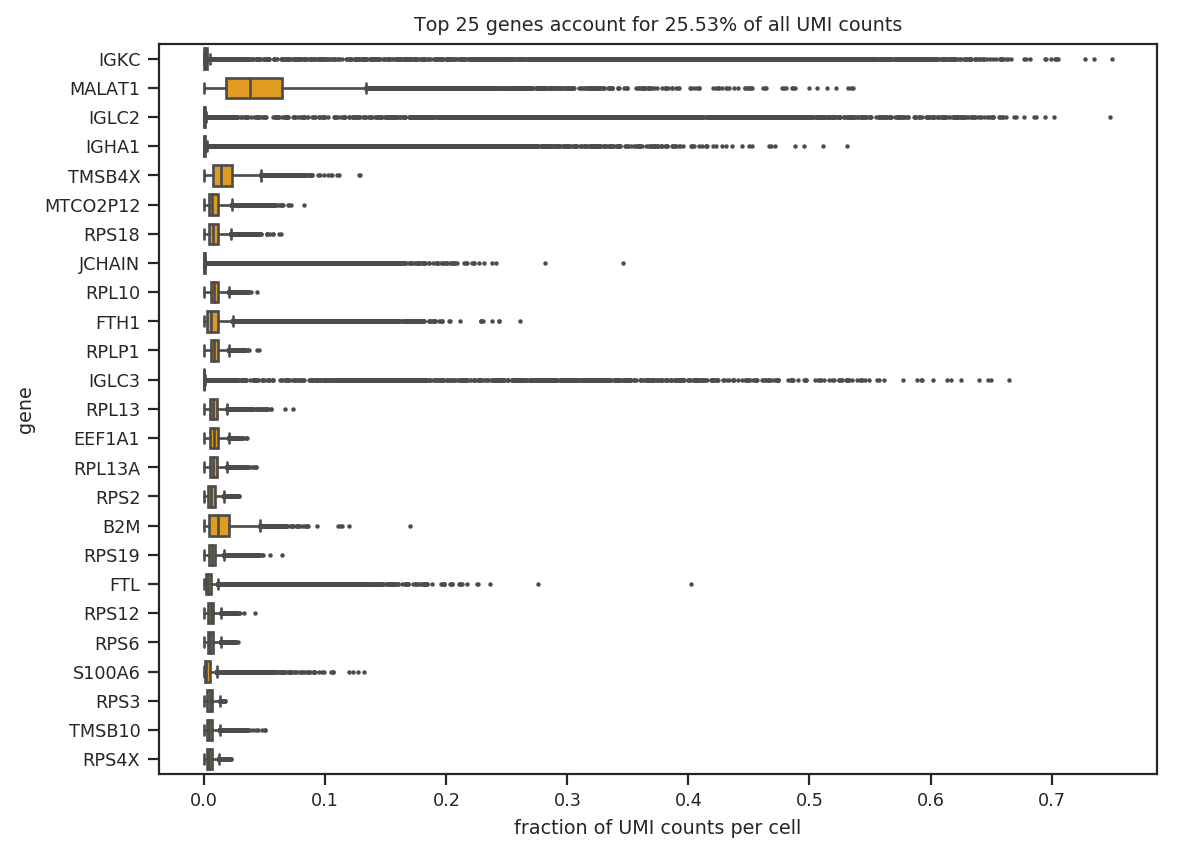

In [31]:
#display the top 25 genes in the dataset
fig, ax = plt.subplots(ncols=1, nrows=1, figsize = (8, 6))
bc.pl.top_genes_counts(adata=adata, top_n=25, ax = ax )
fig.savefig(os.path.join(results_folder, 'figures/top_genes.png'), format='png', bbbox_inches = 'tight') #save figure for QC report

### Per-cell normalization, and output of normalized results ###

In [32]:
adata = bc.st.per_cell_normalize(adata, results_folder)

adata normalized per cell


LOG MESSAGE: Per cell normalization completed successfully.
LOG MESSAGE: Per cell normalization completed successfully.
LOG MESSAGE: 	Time for per-cell normalization: 3.911s
LOG MESSAGE: 	Time for per-cell normalization: 3.911s


log1p values saved into adata.raw
writing out matrix.mtx ...
adata.X successfully written to matrix.mtx
genes successfully written out to genes.tsv
cellbarcodes successfully written out to barcodes.tsv


LOG MESSAGE: cp10k values exported to file.
LOG MESSAGE: cp10k values exported to file.
LOG MESSAGE: 	Time for cp10k export: 374.025s
LOG MESSAGE: 	Time for cp10k export: 374.025s


annotation successfully written out to metadata.tsv


<Figure size 320x320 with 0 Axes>

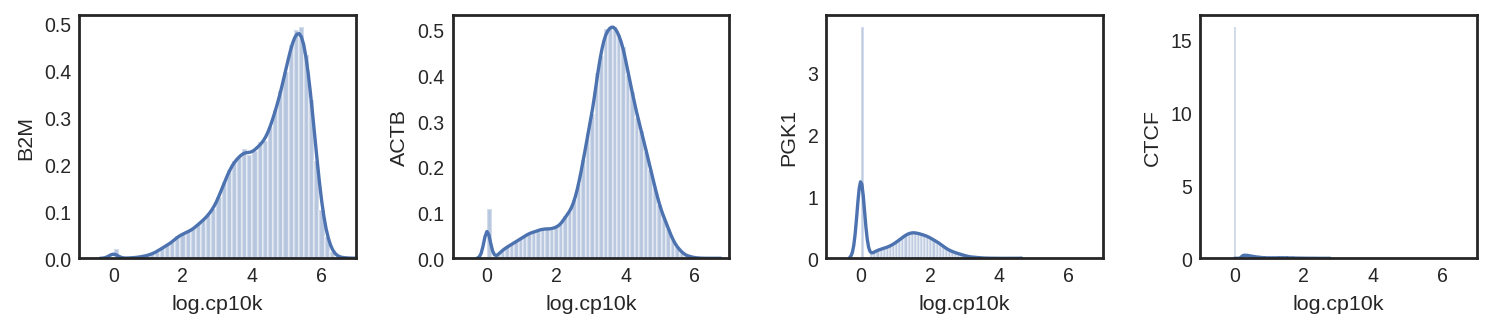

In [33]:
# Further QC: dynamic range of ubi/marker genes
fig = plt.figure()
sns.set(font_scale=0.8)
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(len(dynrange)*2.8,2))
fig.subplots_adjust(hspace=0.2, wspace=0.35)
for i in range(1,len(dynrange)+1):
    ax = fig.add_subplot(1, len(dynrange), i)
    myg=dynrange[i-1]
    try:
        g=sns.distplot(adata.raw[:,myg].X.toarray(), norm_hist=True)
    except:
        print( myg + ' can not be plotted')
    ax.set(xlabel='log.cp10k',ylabel=myg)
    g.set_xlim(-1, 7)


### Feature selection (highly variable genes) for clustering ###

log1p taken of adata


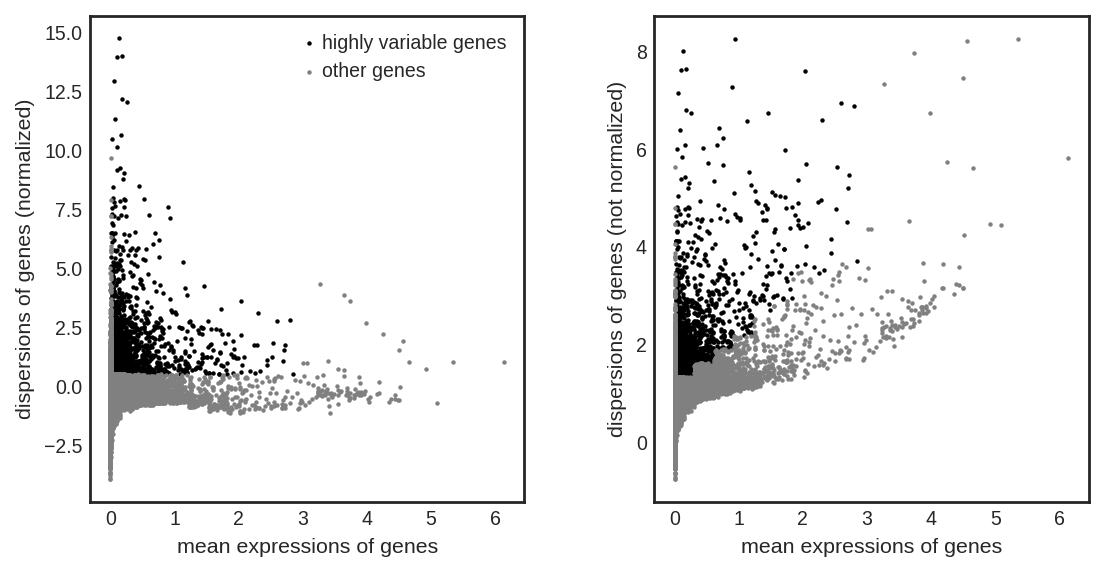

LOG MESSAGE: After feature selection of highly variable genes: 61370 cells, 2192 genes
LOG MESSAGE: After feature selection of highly variable genes: 61370 cells, 2192 genes
LOG MESSAGE: 	Time for feature selection: 8.283s
LOG MESSAGE: 	Time for feature selection: 8.283s


In [34]:
adata = bc.st.highly_variable_genes(adata)

### Regression steps, and output of regressed data ###

In [35]:
adata 

View of AnnData object with n_obs × n_vars = 61370 × 2192 
    obs: 'CELL', 'CONDITION', 'Patient', 'Tissue', 'Sample', 'Cell_type', 'Cell_subtype', 'percent_mito', 'n_counts', 'n_genes'
    var: 'ENSEMBL', 'SYMBOL', 'n_cells', 'total_counts', 'frac_reads'
    uns: 'log1p'

In [36]:
# RMK : AS OF FEB 2020 there is a bug in scanpy regress out if scanpy installed with PIP (see https://github.com/theislab/scanpy/issues/707)
# Before the fix is available, one should coopy the data toprevet it. hence the adata = adata.copy()
adata = adata.copy()
adata = bc.st.regress_out(adata, results_folder)

'n_counts' and 'percent_mito' regressed out


LOG MESSAGE: Regression steps completed. 'n_counts' and 'percent_mito' regressed out. adata was log-normalized and scaled.
LOG MESSAGE: Regression steps completed. 'n_counts' and 'percent_mito' regressed out. adata was log-normalized and scaled.
LOG MESSAGE: 	Time for regression steps: 102.212s
LOG MESSAGE: 	Time for regression steps: 102.212s


adata scaled with max_value set to 10


### Batch correction and PCA neighbor analysis and UMAP

The standard workflow uses bbknn as  batch correction method.


Using random_state = 0 for all the following calculations
PCA calculated using svd_solver = 'arpack'. PCA multiplied by -1 to match Seurat output.


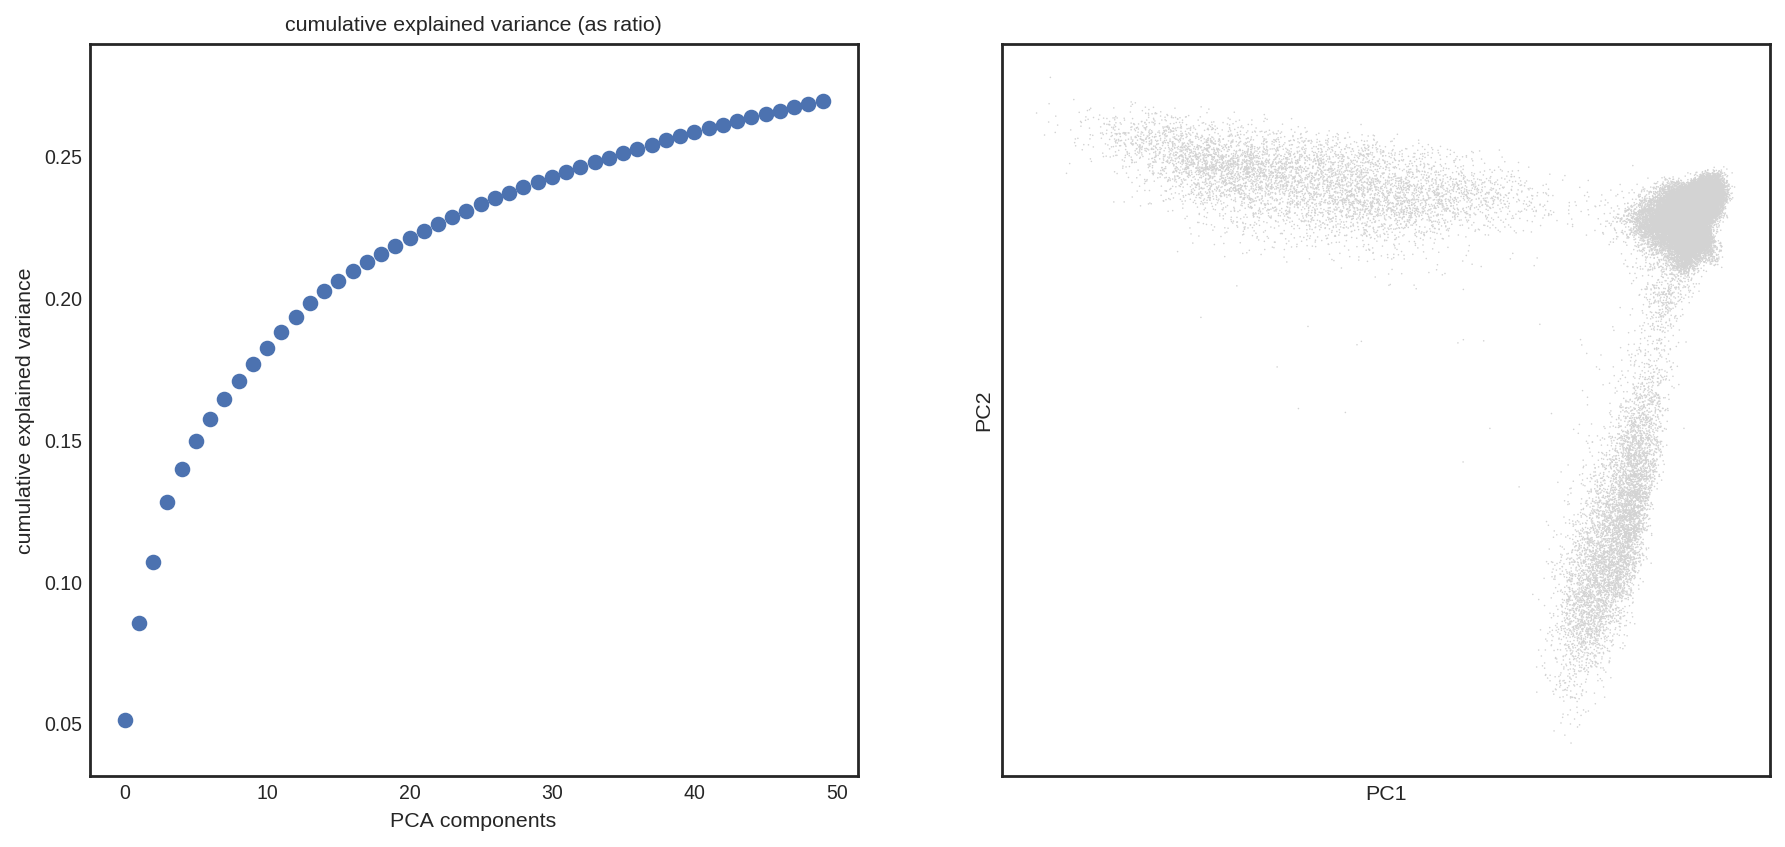

./.conda/envs/besca_dev/lib/python3.7/site-packages/numba/core/typed_passes.py:314: NumbaPerformanceWarning:


The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../home/schwalip/.local/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^


./.local/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning:


The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../home/schwalip/.local/lib/python3.7/site-packages/um

Nearest neighbors calculated with n_neighbors = 10


LOG MESSAGE: Neighborhood analysis completed, and UMAP generated.
LOG MESSAGE: Neighborhood analysis completed, and UMAP generated.
LOG MESSAGE: 	 Time for PCA, nearest neighbor calculation and UMAP generation: 112.134s
LOG MESSAGE: 	 Time for PCA, nearest neighbor calculation and UMAP generation: 112.134s


UMAP coordinates calculated.


LOG MESSAGE: Metadata containing 3 PCAs and UMAP coordinates exported successfully to file.
LOG MESSAGE: Metadata containing 3 PCAs and UMAP coordinates exported successfully to file.
LOG MESSAGE: Time for export: 0.61s
LOG MESSAGE: Time for export: 0.61s


results successfully written out to 'analysis_metadata.tsv'


In [37]:
if (batch_to_correct != 'None'):
    #save a copy of uncorrected in case we need it for something later
    adata_uncorrected = adata.copy()
    adata.obs['batch'] = adata.obs[batch_to_correct]
    adata = bc.st.pca_neighbors_umap(adata,results_folder, method='bbknn')
else:
    adata = bc.st.pca_neighbors_umap(adata, results_folder)
    

### Clustering ###

leiden clustering performed with a resolution of 1.5


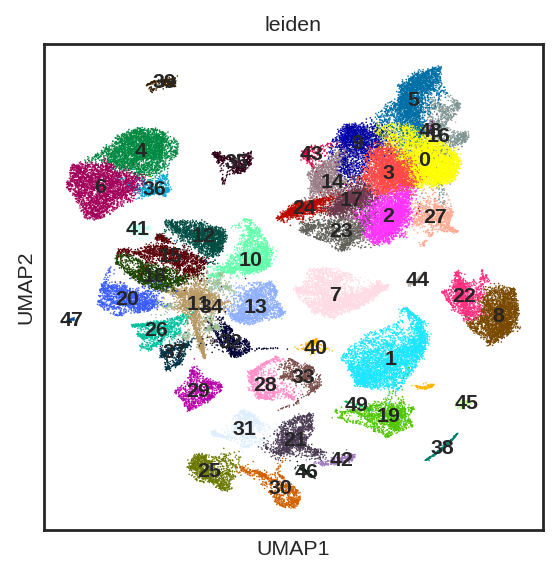

LOG MESSAGE: leidenclustering done. Found 50 clusters.
LOG MESSAGE: leidenclustering done. Found 50 clusters.
LOG MESSAGE: 	Time for leiden clustering: 83.206s
LOG MESSAGE: 	Time for leiden clustering: 83.206s
LOG MESSAGE: Marker gene detection performed on a per-cluster basis using the method wilcoxon.
LOG MESSAGE: Marker gene detection performed on a per-cluster basis using the method wilcoxon.
LOG MESSAGE: 	Time for marker gene detection: 166.7s
LOG MESSAGE: 	Time for marker gene detection: 166.7s


rank genes per cluster calculated using method wilcoxon.
mapping of cells to  leiden exported successfully to cell2labels.tsv
average.gct exported successfully to file
fract_pos.gct exported successfully to file
labelinfo.tsv successfully written out
./analyzed/sw_besca2.0_bescapub/labelings/leiden/WilxRank.gct written out
./analyzed/sw_besca2.0_bescapub/labelings/leiden/WilxRank.pvalues.gct written out


LOG MESSAGE: Cluster level analysis and marker genes exported to file.
LOG MESSAGE: Cluster level analysis and marker genes exported to file.
LOG MESSAGE: 	Time for export of cluster level analysis: 16.42s
LOG MESSAGE: 	Time for export of cluster level analysis: 16.42s


./analyzed/sw_besca2.0_bescapub/labelings/leiden/WilxRank.logFC.gct written out


In [38]:
# leiden clustering is the default 
adata = bc.st.clustering(adata, results_folder, myres=1.5) ## at this resolution, B cells are split Naive + Memory

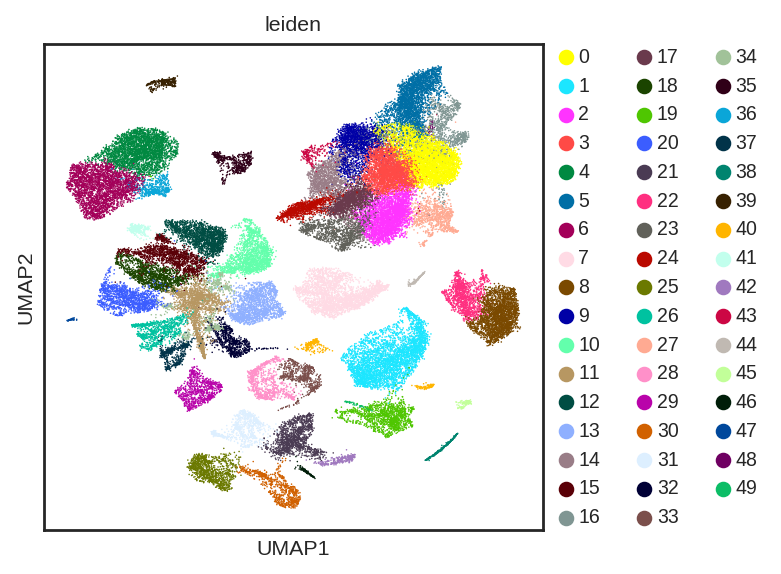

In [39]:
sc.pl.umap(adata,color=['leiden'])

LOG MESSAGE: 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
LOG MESSAGE: 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
LOG MESSAGE: 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
LOG MESSAGE: 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-map

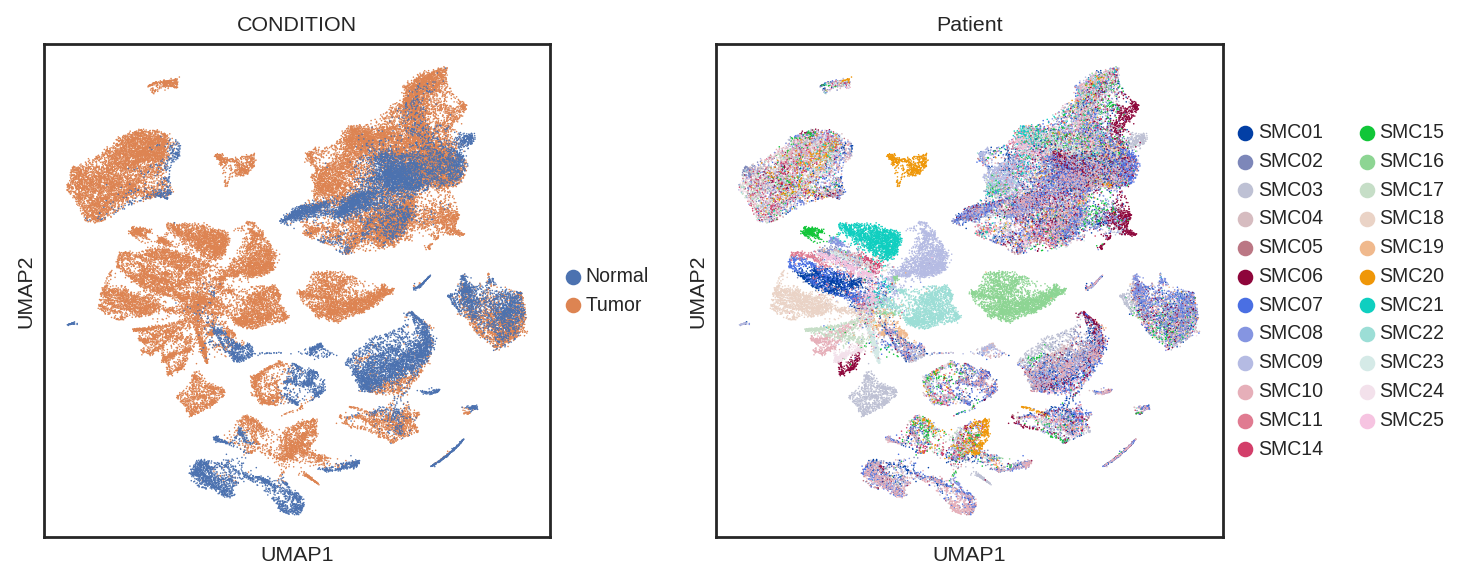

In [41]:
sc.pl.umap(adata,color=['CONDITION','Patient'])

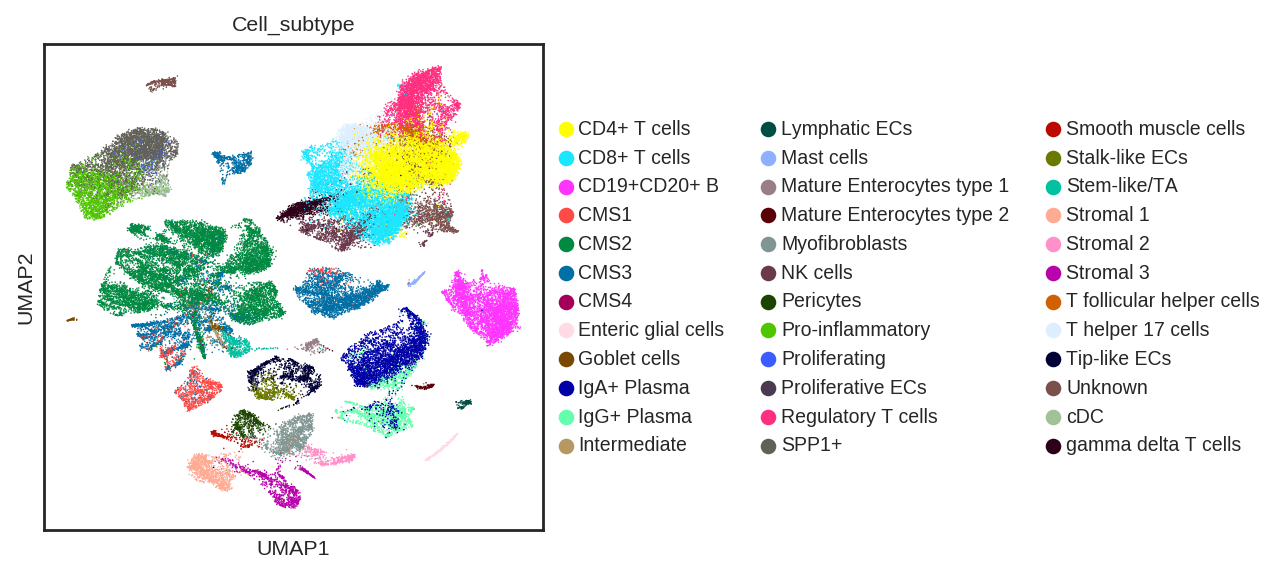

In [42]:
sc.pl.umap(adata,color=['Cell_subtype'])

LOG MESSAGE: 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
LOG MESSAGE: 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
LOG MESSAGE: 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
LOG MESSAGE: 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-map

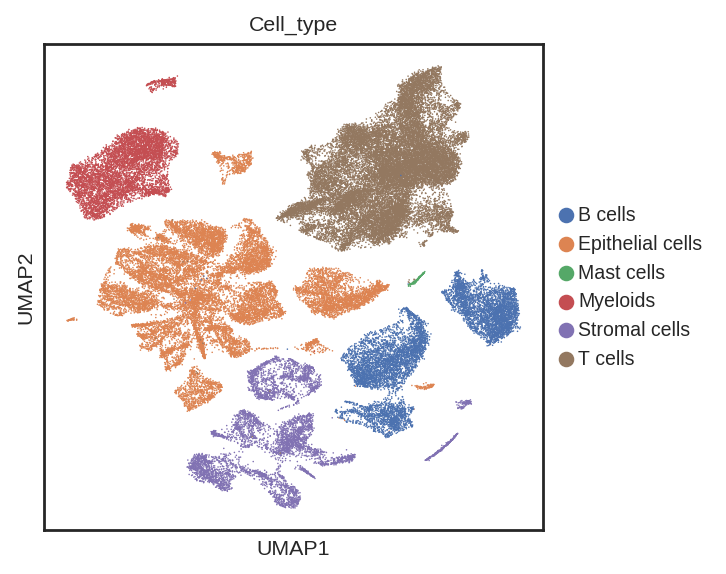

In [43]:
sc.pl.umap(adata,color=['Cell_type'])

In [44]:
# everything that was done so far goes to the .h5ad file for later use
adata.write(results_file)
#print(results_file)

### Additional Labeling ###

(if specified) based on external annotation in "metadata.tsv"  the additional labeling will be exported to file and the fract_pos.gct and average.gct files generated

In [45]:
if (labeling_to_use != 'None'):
    adata = bc.st.additional_labeling(adata, labeling_to_use, labeling_name, labeling_description, labeling_author, results_folder)

### Complete log-file

In [46]:
logging.info('Entire workflow completed.')
logging.info('\tTime for entire workflow: '+str(round(time.time()-start0, 3))+'s')

LOG MESSAGE: Entire workflow completed.
LOG MESSAGE: Entire workflow completed.
LOG MESSAGE: 	Time for entire workflow: 1384.297s
LOG MESSAGE: 	Time for entire workflow: 1384.297s


### Write QC Report

In [47]:
bc.st.write_qc(adata_unfiltered = adata_unfiltered, 
                 adata_filtered = adata,
                 version = version, 
                 analysis_name = analysis_name, 
                 standard_min_genes = standard_min_genes, 
                 standard_min_cells = standard_min_cells, 
                 standard_min_counts = standard_min_counts, 
                 standard_percent_mito = standard_percent_mito, 
                 standard_max_counts = standard_max_counts,
                 standard_n_genes = standard_n_genes,
                 filtering_output1 = filtering1,
                 filtering_output2 = filtering2,
                 results_folder = results_folder,
                 css_path = os.path.join(os.path.dirname(bc.__file__),'st', 'style.css'))
logging.info('QC Report generated and saved as .html')

LOG MESSAGE: QC Report generated and saved as .html
LOG MESSAGE: QC Report generated and saved as .html


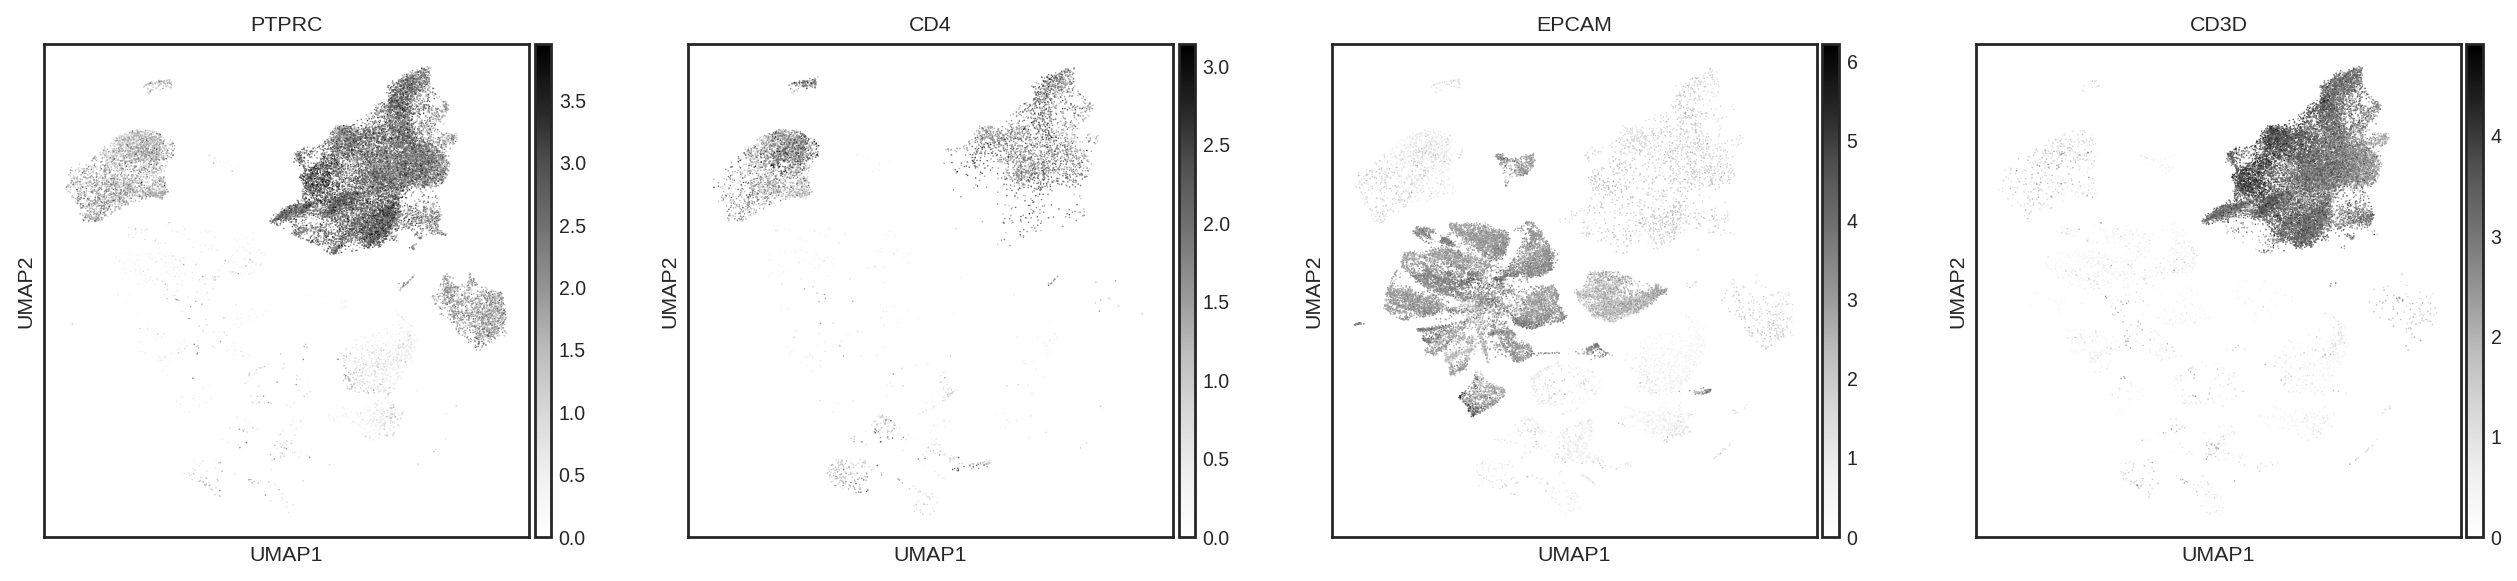

In [48]:
sc.pl.umap(adata,color=['PTPRC','CD4','EPCAM','CD3D'])